### Fetch - Data Analyst Take-Home Exercise: Data Exploration, Insights, and SQL Analysis
### Hedy Liu
#### Feb 23,2025

## First: explore the data

### 1. Loading and Inspecting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load datasets
users_df = pd.read_csv("./USER_TAKEHOME.csv")
transactions_df = pd.read_csv("./TRANSACTION_TAKEHOME.csv")
products_df = pd.read_csv("./PRODUCTS_TAKEHOME.csv")

In [3]:
# Function to display basic dataset info
def explore_data(df, name):
    print(f"\n--- {name} ---\n")
    print(f"Shape: {df.shape}")
    print("\nData Types:\n", df.dtypes)
    print("\nSample Data:\n", df.head())
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nDuplicate Rows:", df.duplicated().sum())

# Explore each dataset
explore_data(products_df, "Products")
explore_data(transactions_df, "Transactions")
explore_data(users_df, "Users")


--- Products ---

Shape: (845552, 7)

Data Types:
 CATEGORY_1       object
CATEGORY_2       object
CATEGORY_3       object
CATEGORY_4       object
MANUFACTURER     object
BRAND            object
BARCODE         float64
dtype: object

Sample Data:
           CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair Care Accessories   
3  Health & Wellness               Oral Care                   Toothpaste   
4  Health & Wellness  Medicines & Treatments               Essential Oils   

  CATEGORY_4                                       MANUFACTURER  \
0        NaN                                                NaN   
1        NaN                                                NaN   
2        NaN                           PLACEHOLDER MANUFACTURER   
3        NaN        

### 2. Identifying and Handling Missing and Duplicate Values
Replaced missing values and removed duplicates.

In [4]:
def handle_missing_values(df):
    # Make a copy of the dataframe to avoid modifying the original
    df_cleaned = df.copy()
    
    # Get numeric and non-numeric columns
    numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
    non_numeric_columns = df_cleaned.select_dtypes(exclude=['int64', 'float64']).columns
    
    # Replace missing values in numeric columns with 0
    for col in numeric_columns:
        df_cleaned[col] = df_cleaned[col].fillna(0)
    
    # Replace missing values in non-numeric columns with "NULL"
    for col in non_numeric_columns:
        df_cleaned[col] = df_cleaned[col].fillna("NULL")
    
    # Print summary of changes
    print("\nMissing Value Handling Summary:")
    print("\nNumeric columns (filled with 0):")
    for col in numeric_columns:
        print(f"- {col}")
    
    print("\nNon-numeric columns (filled with 'NULL'):")
    for col in non_numeric_columns:
        print(f"- {col}")
    
    return df_cleaned

# Apply the function to each dataset
products_df_cleaned = handle_missing_values(products_df)
transactions_df_cleaned = handle_missing_values(transactions_df)
users_df_cleaned = handle_missing_values(users_df)


Missing Value Handling Summary:

Numeric columns (filled with 0):
- BARCODE

Non-numeric columns (filled with 'NULL'):
- CATEGORY_1
- CATEGORY_2
- CATEGORY_3
- CATEGORY_4
- MANUFACTURER
- BRAND

Missing Value Handling Summary:

Numeric columns (filled with 0):
- BARCODE

Non-numeric columns (filled with 'NULL'):
- RECEIPT_ID
- PURCHASE_DATE
- SCAN_DATE
- STORE_NAME
- USER_ID
- FINAL_QUANTITY
- FINAL_SALE

Missing Value Handling Summary:

Numeric columns (filled with 0):

Non-numeric columns (filled with 'NULL'):
- ID
- CREATED_DATE
- BIRTH_DATE
- STATE
- LANGUAGE
- GENDER


In [5]:
def remove_duplicates(df, name):
    # Store original count
    original_count = len(df)
    
    # Remove exact duplicates (all columns)
    df_no_dupes = df.drop_duplicates(keep='first')
    
    # Print results
    print(f"\n--- {name} Duplicate Removal ---")
    print(f"Original records: {original_count}")
    print(f"Records after removing duplicates: {len(df_no_dupes)}")
    print(f"Duplicates removed: {original_count - len(df_no_dupes)}")
    
    return df_no_dupes

# Then remove duplicates from the cleaned datasets
products_df_final = remove_duplicates(products_df_cleaned, "Products")
transactions_df_final = remove_duplicates(transactions_df_cleaned, "Transactions")
users_df_final = remove_duplicates(users_df_cleaned, "Users")



--- Products Duplicate Removal ---
Original records: 845552
Records after removing duplicates: 473000
Duplicates removed: 372552

--- Transactions Duplicate Removal ---
Original records: 50000
Records after removing duplicates: 49829
Duplicates removed: 171

--- Users Duplicate Removal ---
Original records: 100000
Records after removing duplicates: 100000
Duplicates removed: 0


### 3. Users Dataset Analysis

In [6]:
def analyze_users_data(df):
    print("\n=== Users Dataset Analysis ===")
    
    # 1. Basic Information
    print("\nColumns:", list(df.columns))

    
    # Create a copy to avoid modifying the original dataframe
    df_analysis = df.copy()
    
    # 2. Date Analysis
    print("\nDate Range Analysis:")
    df_analysis['CREATED_DATE'] = pd.to_datetime(df_analysis['CREATED_DATE'].replace('NULL', pd.NaT)).dt.tz_localize(None)
    df_analysis['BIRTH_DATE'] = pd.to_datetime(df_analysis['BIRTH_DATE'].replace('NULL', pd.NaT)).dt.tz_localize(None)
    
    print("\nCreated Date Statistics:")
    print(f"Earliest: {df_analysis['CREATED_DATE'].min()}")
    print(f"Latest: {df_analysis['CREATED_DATE'].max()}")
    print(f"Null Values: {df_analysis['CREATED_DATE'].isna().sum()}")
    
    print("\nBirth Date Statistics:")
    print(f"Earliest: {df_analysis['BIRTH_DATE'].min()}")
    print(f"Latest: {df_analysis['BIRTH_DATE'].max()}")
    print(f"Null Values: {df_analysis['BIRTH_DATE'].isna().sum()}")
    
    # 3. Age Analysis
    # Calculate age 
    current_time = pd.Timestamp.now().tz_localize(None)
    df_analysis['AGE'] = None
    mask = ~df_analysis['BIRTH_DATE'].isna()
    df_analysis.loc[mask, 'AGE'] = (current_time - df_analysis.loc[mask, 'BIRTH_DATE']).dt.total_seconds() / (365.25 * 24 * 60 * 60)
    
    print("\nAge Statistics:")
    print(df_analysis['AGE'].describe())
    
    # 4. State Distribution
    print("\nTop 10 States:")
    state_counts = df_analysis['STATE'].value_counts()
    print(state_counts.head(10))
    print(f"\nUnique States: {df_analysis['STATE'].nunique()}")
    print(f"NULL States: {(df_analysis['STATE'] == 'NULL').sum()}")
    
    # 5. Language Distribution
    print("\nLanguage Distribution:")
    lang_counts = df_analysis['LANGUAGE'].value_counts()
    print(lang_counts)
    print(f"\nUnique Languages: {df_analysis['LANGUAGE'].nunique()}")
    print(f"NULL Languages: {(df_analysis['LANGUAGE'] == 'NULL').sum()}")
    
    # 6. Gender Distribution
    print("\nGender Distribution:")
    gender_counts = df_analysis['GENDER'].value_counts()
    print(gender_counts)
    print(f"\nUnique Genders: {df_analysis['GENDER'].nunique()}")
    print(f"NULL Genders: {(df_analysis['GENDER'] == 'NULL').sum()}")
    
    # 7. Data Quality Issues
    print("\nPotential Data Quality Issues:")
    
    # Check for unrealistic ages
    valid_ages = df_analysis[df_analysis['AGE'].notna()]['AGE']
    unrealistic_ages = valid_ages[(valid_ages < 10) | (valid_ages > 120)]
    if len(unrealistic_ages) > 0:
        print(f"- Found {len(unrealistic_ages)} records with potentially unrealistic ages (<10 or >120)")


# Run the analysis
analyze_users_data(users_df_final)


=== Users Dataset Analysis ===

Columns: ['ID', 'CREATED_DATE', 'BIRTH_DATE', 'STATE', 'LANGUAGE', 'GENDER']

Date Range Analysis:

Created Date Statistics:
Earliest: 2014-04-18 23:14:55
Latest: 2024-09-11 17:59:15
Null Values: 0

Birth Date Statistics:
Earliest: 1900-01-01 00:00:00
Latest: 2022-04-03 07:00:00
Null Values: 3675

Age Statistics:
count     96325.000000
unique    54721.000000
top          55.147981
freq       1272.000000
Name: AGE, dtype: float64

Top 10 States:
STATE
TX      9028
FL      8921
CA      8589
NY      5703
NULL    4812
IL      3794
GA      3718
PA      3644
OH      3519
NC      3399
Name: count, dtype: int64

Unique States: 53
NULL States: 4812

Language Distribution:
LANGUAGE
en        63403
NULL      30508
es-419     6089
Name: count, dtype: int64

Unique Languages: 3
NULL Languages: 30508

Gender Distribution:
GENDER
female                    64240
male                      25829
NULL                       5892
transgender                1772
prefer_not_t


=== USERS DATASET ANALYSIS ===



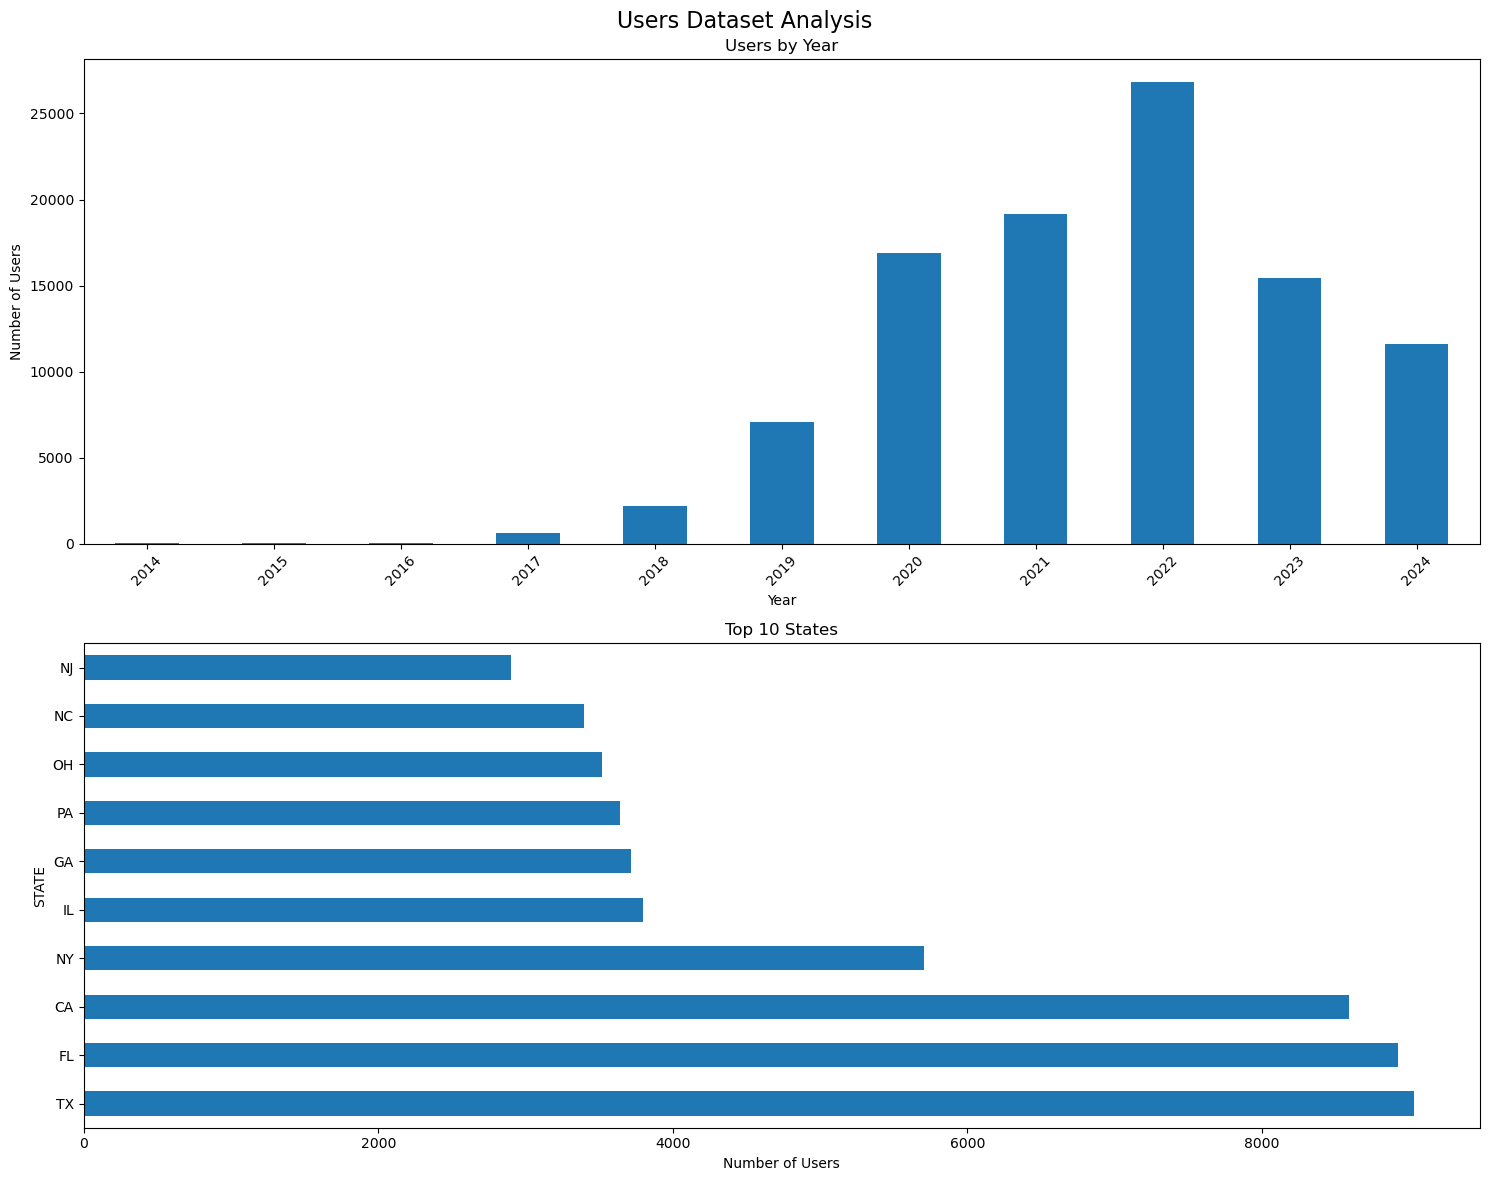

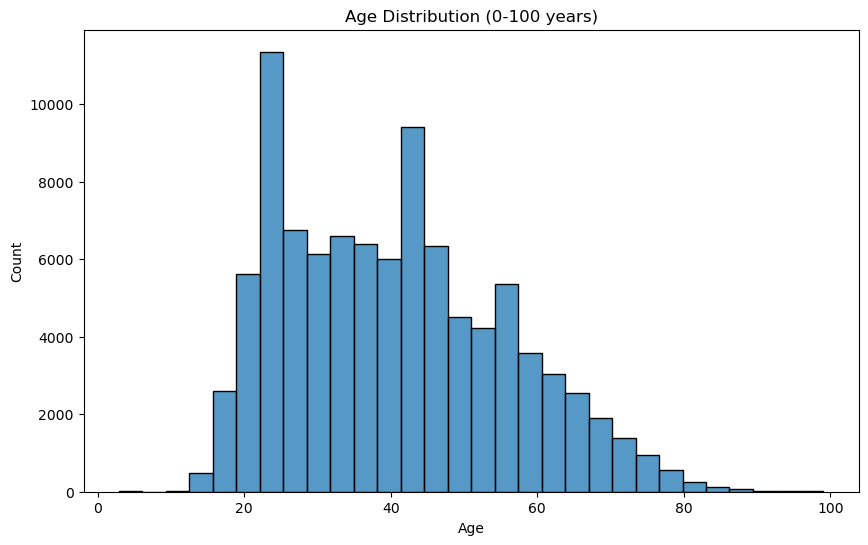

In [7]:
def simple_user_eda(df):
    """
    Performs basic exploratory data analysis on the users dataset.
    
    Parameters:
    df (pandas.DataFrame): Users dataset
    """
    
   
    df = df.copy()
    
    print("\n=== USERS DATASET ANALYSIS ===\n")
    
    

    fig, axes = plt.subplots(2, 1, figsize=(15, 12))
    fig.suptitle('Users Dataset Analysis', fontsize=16)
    
    # User Growth Over Time
    # Handle NULL values and timezone
    df['CREATED_DATE'] = pd.to_datetime(df['CREATED_DATE'].replace('NULL', pd.NaT)).dt.tz_localize(None)
    yearly_users = df.groupby(df['CREATED_DATE'].dt.year).size()
    yearly_users.plot(kind='bar', ax=axes[0], title='Users by Year')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Number of Users')
    axes[0].tick_params(axis='x', rotation=45)
    
    # State Distribution (Top 10)
    state_counts = df['STATE'].value_counts()
    state_counts = state_counts[state_counts.index != 'NULL'].head(10)
    state_counts.plot(kind='barh', ax=axes[1], title='Top 10 States')
    axes[1].set_xlabel('Number of Users')
    
    plt.tight_layout()
    plt.show()
    
    
    # Age Analysis
    if 'BIRTH_DATE' in df.columns:
        # Handle NULL values and timezone
        df['BIRTH_DATE'] = pd.to_datetime(df['BIRTH_DATE'].replace('NULL', pd.NaT)).dt.tz_localize(None)
        
        # Calculate age only for non-null birth dates
        valid_birth_dates = df[df['BIRTH_DATE'].notna()]
        if not valid_birth_dates.empty:
            current_time = pd.Timestamp.now()
            ages = (current_time - valid_birth_dates['BIRTH_DATE']).dt.total_seconds() / (365.25 * 24 * 60 * 60)
            
        
            # Age distribution plot
            plt.figure(figsize=(10, 6))
            sns.histplot(ages[ages.between(0, 100)], bins=30)  # Filter out unrealistic ages
            plt.title('Age Distribution (0-100 years)')
            plt.xlabel('Age')
            plt.ylabel('Count')
            plt.show()
            

# Run the analysis
simple_user_eda(users_df_final)

#### Users Dataset Conclusions

#### Potential Data Quality Issues
- Identified 44 records with potentially unrealistic ages (<10 or >120).

#### Gender Category Consolidation
Some gender categories have variations that can be merged for clarity and consistency:

- **Prefer not to say**: `prefer_not_to_say` (1,350) and `Prefer not to say` (1).
- **Non-binary**: `non_binary` (473) and `Non-Binary` (34).
- **Unspecified/Unknown**: `unknown` (196), `not_listed` (180), `not_specified` (28), and `My gender isn't listed` (5).

These adjustments help reduce redundancy while maintaining data integrity.

### 4. Transactions Dataset Analysis

In [8]:
def analyze_transactions_data(df):
    print("\n=== Transactions Dataset Analysis ===")
    
    # Create a copy for analysis
    df_analysis = df.copy()
    
    # 1. Basic Information
    print("\nColumns:", list(df_analysis.columns))
    
    # 2. Missing Values Analysis
    print("\nMissing Values Analysis:")
    missing_values = df_analysis.isin(['NULL', '', ' ']).sum()
    print(missing_values[missing_values > 0])
    
    # 3. Date Analysis
    print("\nDate Range Analysis:")
    # Convert dates and handle timezones consistently
    df_analysis['PURCHASE_DATE'] = pd.to_datetime(df_analysis['PURCHASE_DATE']).dt.tz_localize(None)
    df_analysis['SCAN_DATE'] = pd.to_datetime(df_analysis['SCAN_DATE']).dt.tz_localize(None)
    
    print("\nPurchase Date Range:")
    print(f"Earliest: {df_analysis['PURCHASE_DATE'].min()}")
    print(f"Latest: {df_analysis['PURCHASE_DATE'].max()}")
    
    print("\nScan Date Range:")
    print(f"Earliest: {df_analysis['SCAN_DATE'].min()}")
    print(f"Latest: {df_analysis['SCAN_DATE'].max()}")
    
    # 4. Store Analysis
    print("\nStore Distribution:")
    store_counts = df_analysis['STORE_NAME'].value_counts()
    print(store_counts.head(10))
    print(f"\nTotal Unique Stores: {df_analysis['STORE_NAME'].nunique()}")
    
    # 5. Transaction Value Analysis
    # Handle FINAL_SALE conversion more carefully
    df_analysis['FINAL_SALE'] = df_analysis['FINAL_SALE'].replace(['NULL', '', ' '], np.nan)
    df_analysis['FINAL_SALE'] = pd.to_numeric(df_analysis['FINAL_SALE'], errors='coerce')
    
    print("\nTransaction Value Statistics:")
    print(df_analysis['FINAL_SALE'].describe())
    
    # 6. Quantity Analysis
    print("\nQuantity Distribution:")
    print(df_analysis['FINAL_QUANTITY'].value_counts().head())
    
    # Convert FINAL_QUANTITY to numeric for analysis
    df_analysis['QUANTITY_NUMERIC'] = df_analysis['FINAL_QUANTITY'].replace('zero', '0')
    df_analysis['QUANTITY_NUMERIC'] = pd.to_numeric(df_analysis['QUANTITY_NUMERIC'], errors='coerce')
    
    # 7. Data Quality Issues
    print("\nPotential Data Quality Issues:")
    
    # Check sales values
    print(f"Negative sales: {len(df_analysis[df_analysis['FINAL_SALE'] < 0])}")
    print(f"High value sales (>$1000): {len(df_analysis[df_analysis['FINAL_SALE'] > 1000])}")
    print(f"Missing sales values: {df_analysis['FINAL_SALE'].isna().sum()}")
    
    # Check dates
    current_time = pd.Timestamp.now().tz_localize(None)
    print(f"Future purchase dates: {len(df_analysis[df_analysis['PURCHASE_DATE'] > current_time])}")
    
    # Check quantity-sale mismatches
    zero_qty_nonzero_sale = len(df_analysis[(df_analysis['QUANTITY_NUMERIC'] == 0) & (df_analysis['FINAL_SALE'] > 0)])
    nonzero_qty_zero_sale = len(df_analysis[(df_analysis['QUANTITY_NUMERIC'] > 0) & (df_analysis['FINAL_SALE'] == 0)])
    print(f"Zero quantity with non-zero sale: {zero_qty_nonzero_sale}")
    print(f"Non-zero quantity with zero sale: {nonzero_qty_zero_sale}")  

# Run the analysis
analyze_transactions_data(transactions_df_final)


=== Transactions Dataset Analysis ===

Columns: ['RECEIPT_ID', 'PURCHASE_DATE', 'SCAN_DATE', 'STORE_NAME', 'USER_ID', 'BARCODE', 'FINAL_QUANTITY', 'FINAL_SALE']

Missing Values Analysis:
FINAL_SALE    12486
dtype: int64

Date Range Analysis:

Purchase Date Range:
Earliest: 2024-06-12 00:00:00
Latest: 2024-09-08 00:00:00

Scan Date Range:
Earliest: 2024-06-12 06:36:34.910000
Latest: 2024-09-08 23:07:19.836000

Store Distribution:
STORE_NAME
WALMART                   21249
DOLLAR GENERAL STORE       2744
ALDI                       2632
TARGET                     1484
KROGER                     1475
DOLLAR TREE STORES INC     1232
PUBLIX                     1183
MEIJER                     1174
CVS                        1166
WALGREENS                  1131
Name: count, dtype: int64

Total Unique Stores: 954

Transaction Value Statistics:
count    37343.000000
mean         4.584066
std          6.632455
min          0.000000
25%          1.820000
50%          3.000000
75%          5.19000


=== TRANSACTIONS DATASET ANALYSIS ===



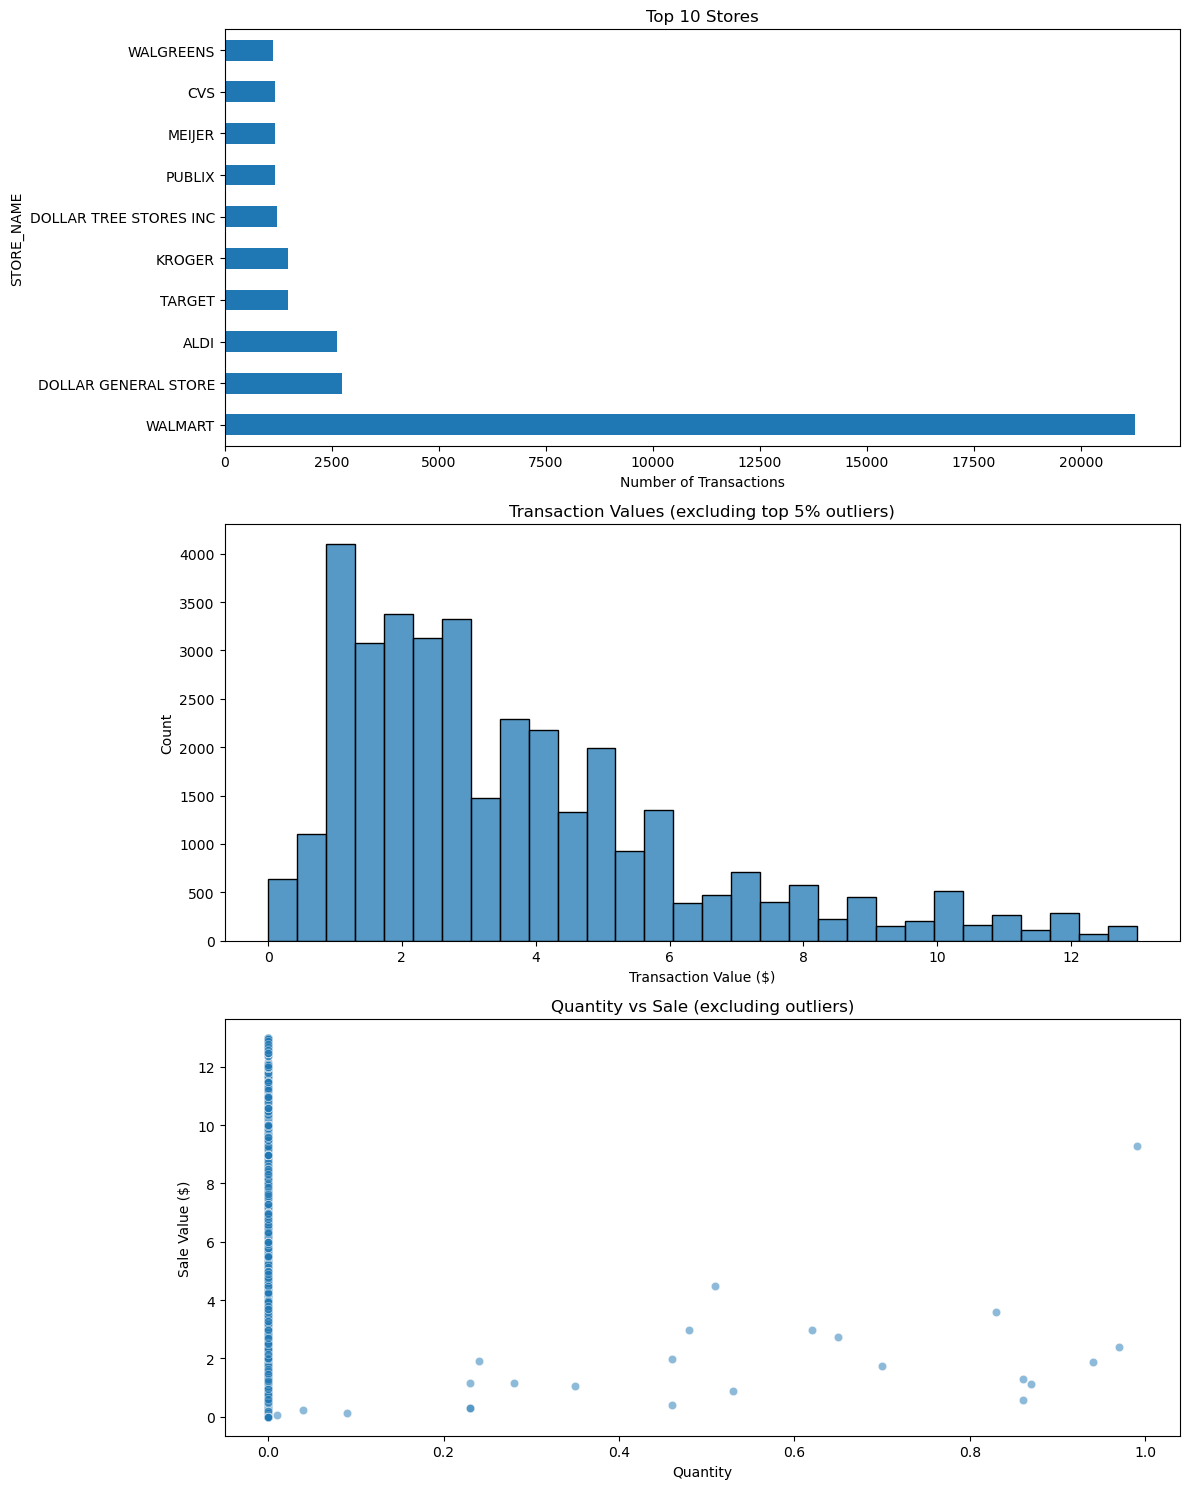

In [9]:
def simple_transactions_eda(df):
    """
    Performs basic exploratory data analysis on the transactions dataset.
    """

    
    print("\n=== TRANSACTIONS DATASET ANALYSIS ===\n")
    
    # Create a deep copy of the dataframe
    df_analysis = df.copy()
    
   
    # Create figure with 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
    
    # Store Distribution (Top 10)
    store_counts = df_analysis['STORE_NAME'].value_counts().head(10)
    store_counts.plot(kind='barh', ax=ax1, title='Top 10 Stores')
    ax1.set_xlabel('Number of Transactions')
    
    # Transaction Value Distribution
    # Convert sales to numeric properly
    df_analysis.loc[:, 'FINAL_SALE'] = pd.to_numeric(df_analysis['FINAL_SALE'], errors='coerce')
    sale_data = df_analysis[df_analysis['FINAL_SALE'] < df_analysis['FINAL_SALE'].quantile(0.95)]
    
    sns.histplot(data=sale_data, x='FINAL_SALE', bins=30, ax=ax2)
    ax2.set_title('Transaction Values (excluding top 5% outliers)')
    ax2.set_xlabel('Transaction Value ($)')
    
    # Quantity vs Sale Scatter Plot
    df_analysis.loc[:, 'FINAL_QUANTITY'] = pd.to_numeric(
        df_analysis['FINAL_QUANTITY'].replace('zero', '0'), 
        errors='coerce'
    )
    
    # Filter outliers
    df_filtered = df_analysis[
        (df_analysis['FINAL_SALE'] < df_analysis['FINAL_SALE'].quantile(0.95)) & 
        (df_analysis['FINAL_QUANTITY'] < df_analysis['FINAL_QUANTITY'].quantile(0.95))
    ]
    
    sns.scatterplot(data=df_filtered, x='FINAL_QUANTITY', y='FINAL_SALE', alpha=0.5, ax=ax3)
    ax3.set_title('Quantity vs Sale (excluding outliers)')
    ax3.set_xlabel('Quantity')
    ax3.set_ylabel('Sale Value ($)')
    
    plt.tight_layout()
    plt.show()
    


# Run the analysis
simple_transactions_eda(transactions_df_final)

⚠️ Here shows a significant issue with the mismatch between **FINAL_QUANTITY** and **FINAL_SALE**. Based on the missing values analysis and the scatter plot, we can observe cases where there is a **sale value but no corresponding quantity** (e.g., points on the y-axis with values while the x-axis approaches zero). 

In [10]:
# Sort by barcode and show all transactions
barcode_transactions = transactions_df_final[['BARCODE', 'FINAL_QUANTITY', 'FINAL_SALE']].sort_values('BARCODE')

print("\nAll transactions sorted by barcode:")
print(barcode_transactions)

# Sort by barcode and receipt_id
barcode_transactions = transactions_df_final[['BARCODE', 'RECEIPT_ID', 'FINAL_QUANTITY', 'FINAL_SALE']].sort_values(['BARCODE', 'RECEIPT_ID'])

print("\nAll transactions sorted by barcode and receipt_id:")
print(barcode_transactions)


All transactions sorted by barcode:
            BARCODE FINAL_QUANTITY FINAL_SALE
10457 -1.000000e+00           zero          3
25312 -1.000000e+00              1          3
42636 -1.000000e+00              1       1.25
169   -1.000000e+00           zero          5
45823 -1.000000e+00              1          5
...             ...            ...        ...
26254  8.900000e+12              1          8
10430  8.900000e+12              1           
18377  8.900000e+12           zero         10
6052   9.350000e+12              1           
31489  9.350000e+12              1       5.97

[49829 rows x 3 columns]

All transactions sorted by barcode and receipt_id:
            BARCODE                            RECEIPT_ID FINAL_QUANTITY  \
169   -1.000000e+00  01cdaa22-a912-496b-8287-87cd9e6b3b1a           zero   
45823 -1.000000e+00  01cdaa22-a912-496b-8287-87cd9e6b3b1a              1   
6010  -1.000000e+00  3d539304-a2d1-47fd-846e-799cc8d1d15d              1   
42636 -1.000000e+00  3d539304

To analyze this further, I grouped the data by **BARCODE** and **RECEIPT_ID** to determine the correct unit price. However, I noticed a pattern:

Example Table

| RECEIPT_ID  | BARCODE     | FINAL_QUANTITY | FINAL_SALE |
|-------------|------------|---------------|------------|
| 00017e0a... | 78742229751 | 1             | *(missing)* |
| b3aab18d... | 78742229751 | zero          | 2.54       |
| 00017e0a... | 78742229751 | 1             | 2.54       |
| b3aab18d... | 78742229751 | 1             | 2.54       |



- The first record has **FINAL_QUANTITY = 1** but a missing **FINAL_SALE**.
- The second record has **FINAL_QUANTITY = "zero"** but a valid **FINAL_SALE = 2.54**.
- The third and fourth records appear correct.

- Futhermore, each product (barcode) and purchase record (receipt) combine as a unique unit has one correct result.
- Another record exists with missing **FINAL_SALE** or `"zero"` as **FINAL_QUANTITY**, which seems to be an error.
Based on this pattern, I assume these incorrect records are erroneous.  

- Thus, for this assignment, I will remove records where FINAL_SALE is missing and FINAL_QUANTITY is zero.

In [11]:
# Remove rows where FINAL_QUANTITY is 'zero' AND FINAL_SALE is missing/empty
transactions_df_final = transactions_df_final[
    ~((transactions_df_final['FINAL_QUANTITY'] == 'zero') | 
      ((transactions_df_final['FINAL_SALE'].isna()) | 
       (transactions_df_final['FINAL_SALE'] == '')))
]

print(f"\nRecords after removing rows with zero quantity and missing sales:")
print(f"Total records: {len(transactions_df_final)}")
print("\nSample of cleaned data:")
print(transactions_df_final[['BARCODE', 'FINAL_QUANTITY', 'FINAL_SALE']].head())


Records after removing rows with zero quantity and missing sales:
Total records: 37338

Sample of cleaned data:
        BARCODE FINAL_QUANTITY FINAL_SALE
0  1.530001e+10              1           
2  7.874223e+10              1           
4  4.790050e+10              1           
6  4.920091e+10              1           
8  5.200001e+10              1           


#### Transactions Dataset Conclusions
Potential Data Quality Issues: 
- Identified records with mismatched `FINAL_QUANTITY` and `FINAL_SALE`.  
- Found cases where `FINAL_QUANTITY = 1` but `FINAL_SALE` was missing.  
- Found cases where `FINAL_QUANTITY = "zero"` but `FINAL_SALE` had a valid value.  
- Based on this pattern, removed records where `FINAL_SALE` was missing and `FINAL_QUANTITY` was zero.

### 5. Products Dataset Analysis

In [12]:
def analyze_products_data(df):
    print("\n=== Products Dataset Analysis ===")
    
    # Basic counts
    print(f"\nTotal Records: {len(df)}")
    print(f"Unique Barcodes: {df['BARCODE'].nunique()}")
    print(f"Unique Brands: {df['BRAND'].nunique()}")
    print(f"Unique Manufacturers: {df['MANUFACTURER'].nunique()}")
    
    # Check for duplicate barcodes
    duplicates = df[df['BARCODE'].duplicated()]
    print(f"\nDuplicate barcodes found: {len(duplicates)}")
    
    # Show category levels
    for i in range(1, 5):
        print(f"\nCATEGORY_{i} unique values: {df[f'CATEGORY_{i}'].nunique()}")
    
    # Show sample of data structure
    print("\nSample of product categories:")
    print(df[['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4']].head())

# Run analysis
analyze_products_data(products_df_final)


=== Products Dataset Analysis ===

Total Records: 473000
Unique Barcodes: 354788
Unique Brands: 8123
Unique Manufacturers: 4355

Duplicate barcodes found: 118212

CATEGORY_1 unique values: 28

CATEGORY_2 unique values: 122

CATEGORY_3 unique values: 345

CATEGORY_4 unique values: 128

Sample of product categories:
          CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair Care Accessories   
3  Health & Wellness               Oral Care                   Toothpaste   
4  Health & Wellness  Medicines & Treatments               Essential Oils   

  CATEGORY_4  
0       NULL  
1       NULL  
2       NULL  
3       NULL  
4       NULL  


In [13]:
def check_duplicate_attributes(df):
    print("\n=== Simple Duplicate Barcode Analysis ===")
    
    # Get duplicates
    duplicates = df[df['BARCODE'].duplicated(keep=False)]
    
    # Show one example
    print("\nExample of a duplicate barcode:")
    example_barcode = duplicates['BARCODE'].iloc[0]
    print(df[df['BARCODE'] == example_barcode][['BARCODE', 'BRAND', 'MANUFACTURER', 'CATEGORY_1']].head())

# Run analysis
check_duplicate_attributes(products_df_final)


=== Simple Duplicate Barcode Analysis ===

Example of a duplicate barcode:
             BARCODE      BRAND    MANUFACTURER         CATEGORY_1
0       7.964940e+11       NULL            NULL  Health & Wellness
4027    7.964940e+11  SYSTEM JO  SYSTEM JO, LLC  Health & Wellness
37199   7.964940e+11  SYSTEM JO  SYSTEM JO, LLC  Health & Wellness
226390  7.964940e+11  SYSTEM JO  SYSTEM JO, LLC  Health & Wellness
540892  7.964940e+11  SYSTEM JO  SYSTEM JO, LLC  Health & Wellness


The majority of records show consistent values for the same barcode. To ensure data accuracy, duplicate barcodes are removed while retaining the most frequently occurring entry. In case of a tie (e.g., each entry appears twice), the first occurrence is kept.

In [14]:
def remove_duplicate_barcodes(df):
    print("\n=== Removing Duplicate Barcodes ===")
    
    # Store original count
    original_count = len(df)
    
    # Count occurrences of each barcode
    barcode_counts = df['BARCODE'].value_counts()
    
    # Identify barcodes with duplicates
    duplicate_barcodes = barcode_counts[barcode_counts > 1].index
    
    # Initialize list to store indices to keep
    indices_to_keep = []
    
    for barcode in duplicate_barcodes:
        barcode_entries = df[df['BARCODE'] == barcode]
        
        if len(barcode_entries) == 2:
            # For exactly 2 occurrences, keep first one
            indices_to_keep.append(barcode_entries.index[0])
        else:
            # For >2 occurrences, keep most frequent values
            most_frequent = barcode_entries.mode().iloc[0]
            matching_rows = barcode_entries[
                (barcode_entries == most_frequent).all(axis=1)
            ]
            indices_to_keep.append(matching_rows.index[0] if not matching_rows.empty 
                                 else barcode_entries.index[0])
    
    # Add indices of non-duplicate barcodes
    unique_indices = df[~df['BARCODE'].isin(duplicate_barcodes)].index
    final_indices = sorted(set(indices_to_keep) | set(unique_indices))
    
    # Create final deduplicated dataframe
    df_cleaned = df.loc[final_indices].reset_index(drop=True)
    
    print(f"Original records: {original_count}")
    print(f"Records after deduplication: {len(df_cleaned)}")
    print(f"Duplicates removed: {original_count - len(df_cleaned)}")
    
    return df_cleaned

# Run deduplication
products_df_final = remove_duplicate_barcodes(products_df_final)


=== Removing Duplicate Barcodes ===
Original records: 473000
Records after deduplication: 354788
Duplicates removed: 118212



=== PRODUCTS DATASET ANALYSIS ===



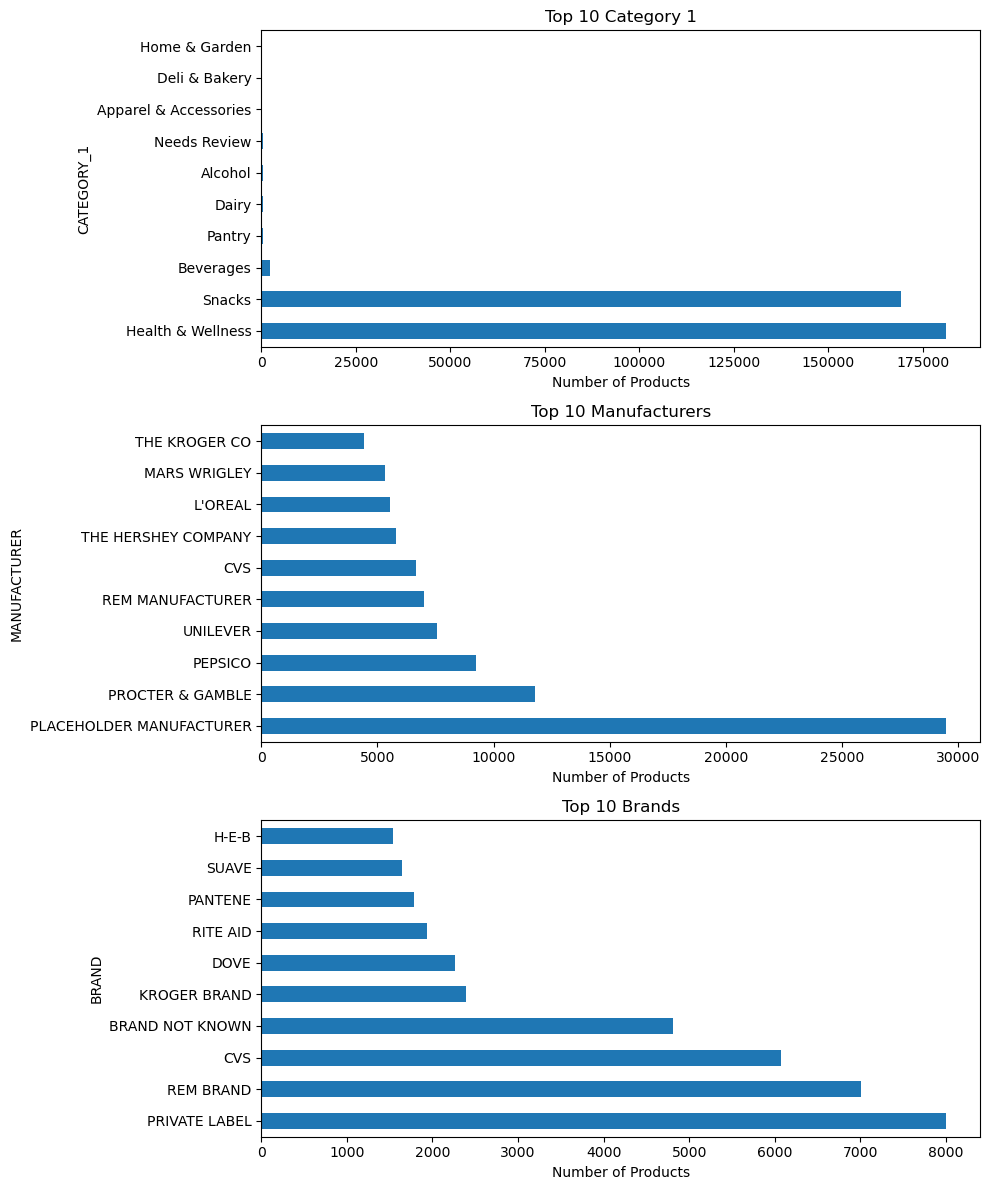

In [15]:
def simple_products_eda(df):
    """
    Simple EDA for products dataset focusing on key visualizations, excluding NULL values.
    """

    
    print("\n=== PRODUCTS DATASET ANALYSIS ===\n")
    
    fig, axes = plt.subplots(3, 1, figsize=(10, 12))
    
    # 1. Top Categories
    cat_counts = df['CATEGORY_1'].value_counts()
    cat_counts = cat_counts[cat_counts.index != 'NULL'].head(10)
    cat_counts.plot(kind='barh', ax=axes[0], title='Top 10 Category 1')
    axes[0].set_xlabel('Number of Products')
    
    # 2. Top Manufacturers
    manu_counts = df['MANUFACTURER'].value_counts()
    manu_counts = manu_counts[manu_counts.index != 'NULL'].head(10)
    manu_counts.plot(kind='barh', ax=axes[1], title='Top 10 Manufacturers')
    axes[1].set_xlabel('Number of Products')
    
    # 3. Top Brands
    brand_counts = df['BRAND'].value_counts()
    brand_counts = brand_counts[brand_counts.index != 'NULL'].head(10)
    brand_counts.plot(kind='barh', ax=axes[2], title='Top 10 Brands')
    axes[2].set_xlabel('Number of Products')
    
    plt.tight_layout()
    plt.show()
    

# Run the analysis
simple_products_eda(products_df_final)

#### Products Dataset Conclusions  

Data Quality Issues  
- Identified **118,212 duplicate barcodes** in the dataset.  

Handling Duplicate Barcodes  
- Removed duplicate barcodes while keeping the most frequently occurring entry.  
- In case of a tie (e.g., occurrence = 2 for each entry), retained the first occurrence.  

Category Distribution  
- The dataset contains **28 unique CATEGORY_1 values**, **122 CATEGORY_2 values**, **345 CATEGORY_3 values**, and **128 CATEGORY_4 values**.  
- A sample review of product categories shows a structured classification but includes some missing values in deeper category levels. 

## Second: provide SQL queries

### Closed-ended Questions
* What are the top 5 brands by receipts scanned among users 21 and over?
* What are the top 5 brands by sales among users that have had their account for at least six months?
* What is the percentage of sales in the Health & Wellness category by generation?


In [16]:
import sqlite3
# Create a SQLite in-memory database
conn = sqlite3.connect(":memory:")

# Load CSV data into Pandas DataFrames
users_df_final.to_sql("users", conn, index=False, if_exists="replace")
transactions_df_final.to_sql("transactions", conn, index=False, if_exists="replace")
products_df_final.to_sql("products", conn, index=False, if_exists="replace")

354788

In [17]:
#1. Top 5 brands by receipts scanned among users 21 and over

query_0 = """
SELECT p.brand, COUNT(t.receipt_id) AS total_receipts
FROM transactions t
JOIN users u ON t.user_id = u.id
JOIN products p ON t.barcode = p.barcode
WHERE (strftime('%Y', 'now') - strftime('%Y', u.birth_date)) >= 21 
AND p.brand <> 'NULL'
GROUP BY p.brand
ORDER BY total_receipts DESC
LIMIT 5;
"""

# Execute the query 
top_brands_21plus = pd.read_sql_query(query_0, conn)

# Display results
print(top_brands_21plus)

         BRAND  total_receipts
0     REPHRESH              15
1         DOVE               5
2  NERDS CANDY               3
3  GREAT VALUE               3
4          UTZ               2


In [18]:
#2. Top 5 brands by sales among users that have had their account for at least six months

query_1 = """
SELECT p.brand, SUM(t.FINAL_SALE) AS total_sales
FROM transactions t
JOIN users u ON t.USER_ID = u.id
JOIN products p ON t.BARCODE = p.BARCODE
WHERE u.created_date <= DATE('now', '-6 months')
GROUP BY p.brand
ORDER BY total_sales DESC
LIMIT 5;
"""
top_brands = pd.read_sql_query(query_1, conn)
print(top_brands)

         BRAND  total_sales
0          CVS        72.00
1     REPHRESH        61.72
2         DOVE        30.91
3      TRIDENT        23.36
4  COORS LIGHT        17.48


In [19]:
#3. Percentage of sales in the Health & Wellness category by generation

query_2 = """
SELECT 
    CASE 
        WHEN strftime('%Y', u.BIRTH_DATE) BETWEEN '1946' AND '1964' THEN 'Baby Boomer'
        WHEN strftime('%Y', u.BIRTH_DATE) BETWEEN '1965' AND '1980' THEN 'Gen X'
        WHEN strftime('%Y', u.BIRTH_DATE) BETWEEN '1981' AND '1996' THEN 'Millennial'
        WHEN strftime('%Y', u.BIRTH_DATE) BETWEEN '1997' AND '2012' THEN 'Gen Z'
    END AS generation,
    SUM(CASE 
            WHEN p.CATEGORY_1 = 'Health & Wellness' 
            THEN t.FINAL_SALE 
            ELSE 0 
            END) * 100.0 
        / SUM(t.FINAL_SALE) AS health_wellness_percentage
FROM transactions t
JOIN users u ON t.USER_ID = u.ID
JOIN products p ON t.BARCODE = p.BARCODE
WHERE strftime('%Y', u.BIRTH_DATE) BETWEEN '1946' AND '2012'
GROUP BY generation
ORDER BY health_wellness_percentage DESC;

"""
sales_by_gen = pd.read_sql_query(query_2, conn)
print(sales_by_gen)

    generation  health_wellness_percentage
0   Millennial                   68.052964
1  Baby Boomer                   58.297420
2        Gen X                   44.705994
3        Gen Z                    0.000000


### Open-ended Questions
* a) Who are Fetch's power users?
* b) Which is the leading brand in the Dips & Salsa category?
* c) At what percent has Fetch grown year over year?

a) Who are Fetch’s power users?

**Assumption of Possible Definition of Power Users:**
- **High-frequency shoppers:** Users who scan receipts often (greater or equal to 5 times in total)
- **High-value spenders:** Users whose purchases contribute the most to overall transaction value

In [20]:
query_3 = """
SELECT t.user_id, COUNT(DISTINCT t.receipt_id) AS total_receipts, SUM(t.final_sale) AS total_spent
FROM transactions t
GROUP BY t.user_id
HAVING COUNT(DISTINCT t.receipt_id) >= 5  
ORDER BY total_spent DESC
LIMIT 10;
"""
df_top_users = pd.read_sql_query(query_3, conn)
print(df_top_users)

                    USER_ID  total_receipts  total_spent
0  60a5363facc00d347abadc8e               5        84.58
1  65845b6bc9e6fe40ea67e108               5        73.65
2  5d77d06b0d1bff4316a3ef47               6        57.21
3  61545c3b504f3536dc3423b6               5        52.50
4  605a982894a5c74ba439e5ab               6        41.89
5  607068e86393686b73dbef4a               5        38.89
6  65d4915916cc391732127174               5        38.76
7  646a82267a342372c857800a               5        37.71
8  6240f64ee073a81bcca57670               6        36.63
9  5eb59d6be7012d13941af5e2               6        34.99


- Fetch's top power users are those who have made at least **5 purchases** and are ranked by total spending.
- There may be a need to adjust the threshold to better capture **truly high-frequency users**, as most users in this dataset have only **5 receipts**.
- Further analysis could involve evaluating **average spending per transaction** or **loyalty trends** over time.

b) Which is the leading brand in the Dips & Salsa category?

**Assumption:** Leading brand refers to the one with the highest revenue.

In [21]:
query_4 = """
SELECT p.BRAND, 
       COUNT(t.BARCODE) AS purchase_count, 
       SUM(t.FINAL_SALE) AS total_revenue
FROM transactions t
JOIN products p ON t.BARCODE = p.BARCODE
WHERE p.CATEGORY_2 = 'Dips & Salsa'
GROUP BY p.BRAND
ORDER BY total_revenue DESC
LIMIT 1;
"""

# Run the query and display results
df_leading_brand = pd.read_sql_query(query_4, conn)
print(df_leading_brand)

      BRAND  purchase_count  total_revenue
0  TOSTITOS              52         168.43


Tostitos is the leading brand in the Dips & Salsa category with:

66 purchases
$239.54 in total revenue

c) At what percent has Fetch grown year over year?
- Since my transactions table only contains PURCHASE_DATE data for 2024, I can't directly calculate year-over-year (YoY) growth using past transactions.

- **I will estimate it in alternative ways: I assume we are looking at active users for growth.**

In [22]:
# SQL Query to calculate YoY growth with new users
query_yoy_growth = """
SELECT 
    year,
    new_users,
    LAG(new_users) OVER (ORDER BY year) AS new_users_last_year,
    CASE 
        WHEN LAG(new_users) OVER (ORDER BY year) IS NOT NULL AND LAG(new_users) OVER (ORDER BY year) != 0
        THEN ((new_users - LAG(new_users) OVER (ORDER BY year)) * 100 / LAG(new_users) OVER (ORDER BY year))
        ELSE NULL
    END AS "YoY_Growth (%)"
FROM (
    SELECT 
        strftime('%Y', CREATED_DATE) AS year,
        COUNT(ID) AS new_users
    FROM users
    WHERE CREATED_DATE IS NOT NULL
    GROUP BY year
) AS yearly_users
ORDER BY year DESC;
"""

# Run the query
df_yoy_growth = pd.read_sql_query(query_yoy_growth, conn)

# Display results
print(df_yoy_growth)

    year  new_users  new_users_last_year  YoY_Growth (%)
0   2024      11631              15464.0           -24.0
1   2023      15464              26807.0           -42.0
2   2022      26807              19159.0            39.0
3   2021      19159              16883.0            13.0
4   2020      16883               7093.0           138.0
5   2019       7093               2168.0           227.0
6   2018       2168                644.0           236.0
7   2017        644                 70.0           820.0
8   2016         70                 51.0            37.0
9   2015         51                 30.0            70.0
10  2014         30                  NaN             NaN


Key Takeaways:
**2015-2020:** Explosive early-stage growth.  
**2020-2022:** Sustained expansion.  
**2023-2024:** Decline, possibly due to market saturation or competition.  


### Others
- Other findings for my further analysis

In [23]:
# SQL Query to calculate YoY sales growth by generation
query_gen_sales_growth = """
SELECT 
    CASE 
        WHEN strftime('%Y', u.BIRTH_DATE) BETWEEN '1946' AND '1964' THEN 'Baby Boomer'
        WHEN strftime('%Y', u.BIRTH_DATE) BETWEEN '1965' AND '1980' THEN 'Gen X'
        WHEN strftime('%Y', u.BIRTH_DATE) BETWEEN '1981' AND '1996' THEN 'Millennial'
        WHEN strftime('%Y', u.BIRTH_DATE) BETWEEN '1997' AND '2012' THEN 'Gen Z'
    END AS generation,
    SUM(t.FINAL_SALE) AS total_sales,
    COUNT(DISTINCT t.USER_ID) AS unique_customers,
    SUM(t.FINAL_SALE)/COUNT(DISTINCT t.USER_ID) AS avg_sale_per_customer
FROM transactions t
JOIN users u ON t.USER_ID = u.ID
WHERE strftime('%Y', u.BIRTH_DATE) BETWEEN '1946' AND '2012'
GROUP BY generation
ORDER BY total_sales DESC;
"""

# Run the query
df_gen_sales_growth = pd.read_sql_query(query_gen_sales_growth, conn)

# Display results
print(df_gen_sales_growth)

    generation  total_sales  unique_customers  avg_sale_per_customer
0  Baby Boomer       230.41                28               8.228929
1   Millennial       194.10                24               8.087500
2        Gen X       169.13                35               4.832286
3        Gen Z         1.97                 1               1.970000


In [24]:
# SQL Query to calculate the total user number trend over the years from the users dataset
query_total_users = """
SELECT 
    year,
    total_users,
    LAG(total_users) OVER (ORDER BY year) AS total_users_last_year,
    CASE 
        WHEN LAG(total_users) OVER (ORDER BY year) IS NOT NULL 
        THEN ((total_users - LAG(total_users) OVER (ORDER BY year)) * 100.0 / LAG(total_users) OVER (ORDER BY year))
        ELSE NULL
    END AS "Total Growth (%)"
FROM (
    SELECT 
        strftime('%Y', CREATED_DATE) AS year,
        COUNT(ID) AS total_users
    FROM users
    WHERE CREATED_DATE IS NOT NULL
    GROUP BY year
) AS yearly_users
ORDER BY year DESC;
"""

# Run the query
df_total_users = pd.read_sql_query(query_total_users, conn)

# Display results
print(df_total_users)


    year  total_users  total_users_last_year  Total Growth (%)
0   2024        11631                15464.0        -24.786601
1   2023        15464                26807.0        -42.313575
2   2022        26807                19159.0         39.918576
3   2021        19159                16883.0         13.481016
4   2020        16883                 7093.0        138.023403
5   2019         7093                 2168.0        227.167897
6   2018         2168                  644.0        236.645963
7   2017          644                   70.0        820.000000
8   2016           70                   51.0         37.254902
9   2015           51                   30.0         70.000000
10  2014           30                    NaN               NaN


In [25]:
conn.close()

## Third: communicate with stakeholders

**Subject:** Key Findings & Data Quality Concerns – User Growth Trends  

Dear Porduct team,

As part of our exploratory data analysis, we have identified some key data quality issues and trends that we’d like to bring to your attention:

Data Quality Issues & Outstanding Questions
- Across all datasets, there are missing or duplicate values, which may limit our ability to analyze customer behavior accurately.
- In the Users dataset, we identified 44 records with unrealistic ages (<10 or >120). Additionally, gender categories have inconsistencies (e.g., variations of "Non-binary" and "Prefer not to say") that could be merged to improve accuracy and reduce redundancy.
- In the Transactions dataset, there is a mismatch between final quantity and final sales values. I made the best possible adjustments based on assumptions to align sales values, but further investigation is needed. For example, this issue might be occurring within a specific time period or more frequently in certain stores.
- In the Products dataset, we found 118,212 duplicate barcodes. I’ve made a judgment call to consolidate duplicates based on frequency, but additional review is needed to ensure correct classification and avoid misclassification.

Key Trend in the Data
- Over the past two years, the total number of users has dropped significantly, decreasing by 42.3% in 2023 (from 26,807 to 15,464) and by 24.8% in 2024 (from 15,464 to 11,631). This decline aligns with generational sales trends, where Baby Boomers contributed the highest total sales at 230.41, followed by Millennials at 194.10 and Gen X at 169.13, while Gen Z generated only 1.97 in sales. With Baby Boomers and Millennials gradually exiting the market and Gen Z spending significantly less, the overall drop in users may be impacting revenue. This highlights the challenge of sustaining sales growth and the need to attract and retain younger customers to compensate for the decline in high-value older generations.

Next Steps & Request for Action
- To move forward, it would be helpful to:<br>
1. Resolve Data Discrepancies – There are inconsistencies between user and transaction datasets that need to be addressed for more accurate trend analysis.<br>
2. Include Pre-2024 Transaction Data – Access to transaction data before 2024 may provide better insights into long-term user behavior and sales trends.<br>
3. Obtain Sales Data (Revenue & Cost) – To perform a more comprehensive growth rate analysis, we need detailed revenue and cost data.<br>
4. Analyze Retention Rate & Inactive Accounts – Adding an "Inactive Account" column will help measure retention rates and analyze potential reasons for user drop-off.

Please let me know if you need any further clarification or if there are additional data points I should consider. Looking forward to your insights!

Best regards,<br>
Hedy Liu<br>
Data Analyst<br>
h.liu@fetchrewards.com